Exercise 5 Task 1

AND Prediction: [0 0 0 1]
OR Prediction: [0 1 1 1]
XOR Prediction: [1 1 0 0]


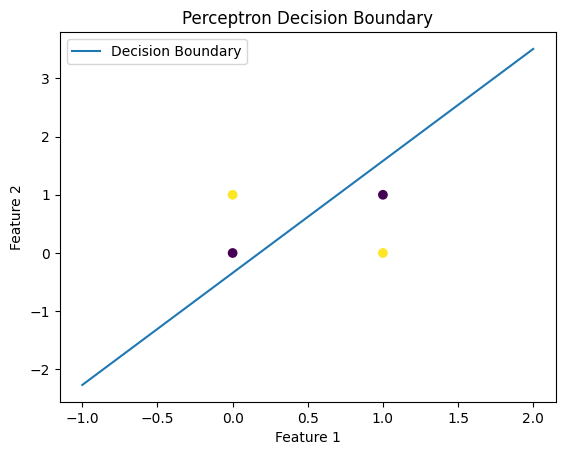

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

weights = None
bias = None
learning_rate = 0.1
n_iters = 10

def fit(X, y):
    global weights, bias
    n_samples, n_features = X.shape
    weights = np.random.rand(n_features)
    bias = np.random.rand()

    for _ in range(n_iters):
        for idx, x_i in enumerate(X):
            linear_output = np.dot(x_i, weights) + bias
            y_predicted = activation_function(linear_output)
            update = learning_rate * (y[idx] - y_predicted)
            weights += update * x_i
            bias += update

def predict(X):
    linear_output = np.dot(X, weights) + bias
    return activation_function(linear_output)

def activation_function(x):
    return np.where(x >= 0, 1, 0)

# Example usage
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_and = np.array([0, 0, 0, 1])
y_or = np.array([0, 1, 1, 1])
y_xor = np.array([0, 1, 1, 0])

# Train for AND
fit(X, y_and)
print("AND Prediction:", predict(X))

# Train for OR
fit(X, y_or)
print("OR Prediction:", predict(X))

# Train for XOR (Note: A simple perceptron cannot solve XOR)
fit(X, y_xor)
print("XOR Prediction:", predict(X))

def plot_decision_boundary(X, y):
    x1 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    x2 = -(bias + x1 * weights[0]) / weights[1]
    plt.plot(x1, x2, label='Decision Boundary')
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Perceptron Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Example for XOR
plot_decision_boundary(X, y_xor)




# Why algorithm does not reach 100% accuracy with XOR data?

The reason why perceptron algorithmn does nor reach 100% accuracy with XOR data is that the perceptron is a linear classifier which works perfectly for linearly separable problems such as AND and OR gates. XOR gate is nonlinear problem and that is why linear classifier like perseptron can't reach full accuracy with it.

# What happens to perceptron weights if you keep updating them for XOR data.

When the perceptron is trained on XOR data, it will continuously update the weights and bias in an attempt to find a suitable line, but since no such line exists, the weights will keep oscillating or diverging without converging to a stable solution. This results in the perceptron failing to accurately classify the XOR data.

Exercise 5 Task 2

Accuracy: 98.20%


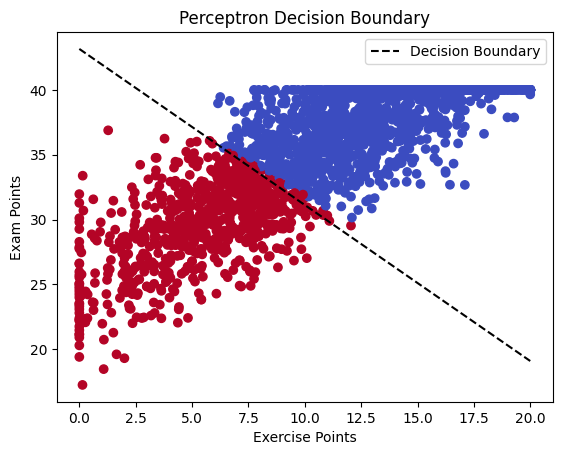

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Global variables for perceptron parameters
weights = None
bias = None
learning_rate = 0.01
n_iters = 1000

def load_data(filename):
    data = pd.read_csv(filename, sep=" ", header=None)
    data.columns = ['ExercisePoints', 'ExamPoints', 'Grade']
    data['Grade'] = pd.to_numeric(data['Grade'], errors='coerce')
    data.dropna(subset=['Grade'], inplace=True)
    return data

def fit(X, y):
    global weights, bias
    n_samples, n_features = X.shape
    weights = np.random.randn(n_features) * 0.01
    bias = 0

    for _ in range(n_iters):
        for idx, x_i in enumerate(X):
            linear_output = np.dot(x_i, weights) + bias
            y_predicted = activation_function(linear_output)
            update = learning_rate * (y[idx] - y_predicted)
            weights += update * x_i
            bias += update

def predict(X):
    linear_output = np.dot(X, weights) + bias
    return activation_function(linear_output)

def activation_function(x):
    return np.where(x >= 0, 1, 0)

def plot_decision_boundary(X, y):
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2 = -(bias + x1 * weights[0]) / weights[1]
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.plot(x1, x2, 'k--', label='Decision Boundary')
    plt.xlabel('Exercise Points')
    plt.ylabel('Exam Points')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.show()

# Main Execution
data = load_data('bogus_student_data.txt')
data['Class'] = (data['Grade'] <= 2).astype(int)
X = np.array(data[['ExercisePoints', 'ExamPoints']], dtype=float)
y = data['Class'].values.astype(int)

fit(X, y)
predictions = predict(X)
accuracy = np.mean(predictions == y)
print(f'Accuracy: {accuracy * 100:.2f}%')
plot_decision_boundary(X, y)


# Do you think the learned weights are good?

The model separates the two classes succesfully and the accuracy is very high 98.20 %. Based on these factors I would say that the weights are good.

# Could they be better? Why the learning algorithm did not reach higher accuracy (if it was below 99%)?

The perceptron is fundamentally limited to linear decision boundaries which means that if dataset is not perfectly linearly separable due to inherent overlaps in the distribution of the two classes around the boundary, the perceptron will inevitably make some errors.

We can see from teh visualization that these is some overlap between two classes so I think that the given accuracy is as good as it can possibly be.